#Importando base e biblioteca

In [3]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_teste, y_teste)  = cifar10.load_data()

#Analizando o conteúdo e normalizando

<function matplotlib.pyplot.show(close=None, block=None)>

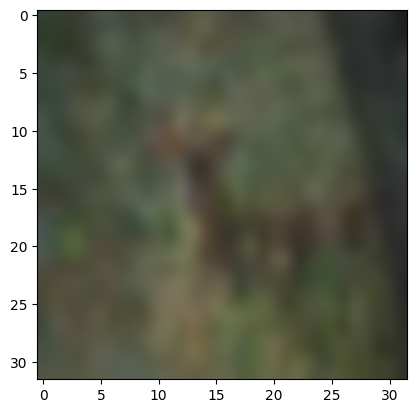

In [5]:
#exempolo de imagem
image = x_train[10]
plt.imshow(image, interpolation='bicubic')
plt.show

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
x_train = x_train.astype('float32') / 255.0
x_teste = x_teste.astype('float32') / 255.0

In [10]:
y_train = to_categorical(y_train, 10)
y_teste = to_categorical(y_teste, 10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#Criação do modelo

In [12]:
modelo = Sequential()

modelo.add(Conv2D(32,(3,3), padding="same", activation='relu', input_shape=(32,32,3)))
modelo.add(Conv2D(32,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size= (2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64,(3,3), padding="same", activation='relu'))
modelo.add(Conv2D(64,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size= (2,2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10, activation='softmax'))

In [13]:
modelo.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
modelo.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 23s 6ms/step - loss: 1.4996 - accuracy: 0.4564
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0643 - accuracy: 0.6226
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9038 - accuracy: 0.6817
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8062 - accuracy: 0.7156
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7286 - accuracy: 0.7438
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6651 - accuracy: 0.7642
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6219 - accuracy: 0.7797
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5728 - accuracy: 0.7974
Epoch 9/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5487 - accuracy: 0.8057
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.

In [14]:
previsoes = modelo.predict(x_teste)

313/313 [==============================] - 1s 3ms/step


In [23]:
previsoes

array([[5.5468042e-04, 4.0166546e-03, 7.0461421e-03, ..., 7.5378810e-04,
        4.0885704e-03, 1.3556740e-03],
       [9.2912198e-04, 4.8229554e-01, 1.6926980e-13, ..., 5.5395049e-16,
        5.1677418e-01, 1.1550064e-06],
       [1.4009862e-01, 8.1352562e-02, 1.5452474e-04, ..., 8.7870809e-05,
        7.7155358e-01, 6.2704640e-03],
       ...,
       [2.1585126e-11, 1.0364121e-12, 1.5450665e-05, ..., 2.1303909e-05,
        7.8866389e-09, 7.6273814e-11],
       [7.6529966e-04, 9.3803281e-01, 3.9922778e-02, ..., 1.0798548e-05,
        2.0438294e-07, 3.4453084e-03],
       [1.2643538e-16, 3.9142737e-18, 6.5807602e-13, ..., 9.9999964e-01,
        1.3414272e-17, 9.4715582e-17]], dtype=float32)

In [24]:
previsoes_classes = np.argmax(previsoes, axis=1)
previsoes_classes


array([3, 8, 8, ..., 5, 1, 7])

In [26]:
y_classes = np.argmax(y_teste, axis=1)
y_classes

array([3, 8, 8, ..., 5, 1, 7])

In [21]:
accuracy = accuracy_score(y_classes, previsoes_classes)
accuracy

1.0

In [22]:
confusion_matrix = confusion_matrix(y_classes, previsoes_classes)
confusion_matrix

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000]])